In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moessam98","key":"a8264b4d4f8fd27a092c233df160634d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wordsforthewise/lending-club

 99% 1.25G/1.26G [00:14<00:00, 103MB/s] 
100% 1.26G/1.26G [00:14<00:00, 94.9MB/s]


In [ ]:
!unzip lending-club.zip

Archive:  lending-club.zip
  inflating: accepted_2007_to_2018Q4.csv.gz  
  inflating: accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: rejected_2007_to_2018Q4.csv.gz  
  inflating: rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


In [ ]:
acc_data=pd.read_csv("/content/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Undersanding the data 
acc_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
acc_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,9.0,NaN,5.0,0.0,8633.0,64.9,37.0,f,23252.59,23252.59,...,55970.0,28398.0,12300.0,42670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,Jul-1999,660.0,664.0,0.0,67.0,72.0,10.0,1.0,17641.0,68.1,31.0,f,0.00,0.00,...,84664.0,62426.0,20700.0,58764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,MORTGAGE,95000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,770xx,TX,23.36,0.0,Jun-1996,660.0,664.0,1.0,37.0,NaN,8.0,0.0,7662.0,54.0,22.0,w,8456.12,8456.12,...,163804.0,44215.0,9500.0,34169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
acc_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

In [ ]:
acc_data.shape

(2260701, 151)

In [ ]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)


In [ ]:
acc_data['member_id'].nunique()

0

In [ ]:
#cleaning the data 
acc_data= acc_data.drop(['member_id'], axis=1)

In [ ]:
acc_data=acc_data.drop(['url', 'zip_code'], axis = 1)

In [ ]:
acc_data=acc_data.drop(['funded_amnt'], axis=1)


In [ ]:
acc_data.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,NaN,small_business,Business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,20000.0,20000.0,60 months,10.78,432.66,

In [ ]:
acc_data=acc_data.drop(['id', 'term', 'installment', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'loan_status', 'desc'], axis=1)

In [ ]:
acc_data=acc_data.drop(['purpose', 'title', 'addr_state', 'delinq_2yrs', 'fico_range_high', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int'], axis=1)

In [ ]:
acc_data=acc_data.drop(['recoveries', 'collection_recovery_fee', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint'], axis=1)

In [ ]:
acc_data=acc_data.drop(['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util', 'open_rv_24m', 'open_rv_12m', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths'], axis=1)

In [ ]:
acc_data=acc_data.drop(['sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term'], axis=1)

In [ ]:
acc_data=acc_data.drop(['debt_settlement_flag_date'], axis=1)

In [ ]:
acc_data.shape

(2260701, 32)

In [ ]:
acc_data[4:10]

,loan_amnt,funded_amnt_inv,int_rate,grade,emp_length,annual_inc,issue_d,pymnt_plan,dti,earliest_cr_line,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc
4,10400.0,10400.0,22.45,F,3 years,104433.0,Dec-2015,n,25.37,Jun-1998,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,73839.0,9702.0
5,11950.0,11950.0,13.44,C,4 years,34000.0,Dec-2015,n,10.20,Oct-1987,690.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,May-2017,7653.56,May-2017,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,3976.0,4522.0
6,20000.0,20000.0,9.17,B,10+ years,180000.0,Dec-2015,n,14.67,Jun-1990,680.0,0.0,12.0,0.0,87329.0,84.5,27.0,f,0.0,Nov-2016,15681.05,Mar-2019,654.0,650.0,0.0,1.0,Individual,0.0,0.0,360358.0,29433.0,13048.0
7,20000.0,20000.0,8.49,B,10+ years,85000.0,Dec-2015,n,17.61,Feb-1999,705.0,0.0,8.0,0.0,826.0,5.7,15.0,w,0.0,Jan-2017,14618.23,Mar-2019,674.0,670.0,0.0,1.0,Individual,0.0,0.0,141601.0,27111.0,640.0
8,10000.0,10000.0,6.49,A,6 years,85000.0,Dec-2015,n,13.07,Apr-2002,685.0,1.0,14.0,1.0,10464.0,34.5,23.0,w,0.0,Aug-2018,1814.48,Mar-2019,719.0,715.0,0.0,1.0,Individual,0.0,8341.0,27957.0,17493.0,2524.0
9,8000.0,8000.0,11.48,B,10+ years,42000.0,Dec-2015,n,34.80,Nov-1994,700.0,0.0,8.0,0.0,7034.0,39.1,18.0,w,0.0,Apr-2017,4996.24,Nov-2018,679.0,675.0,0.0,1.0,Individual,0.0,0.0,199696.0,106748.0,4725.0


In [ ]:
acc_data['Issue_d_month'] = pd.DatetimeIndex(acc_data['issue_d']).month


In [ ]:
acc_data.head()

,loan_amnt,funded_amnt_inv,int_rate,grade,emp_length,annual_inc,issue_d,pymnt_plan,dti,earliest_cr_line,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,Issue_d_month
0,3600.0,3600.0,13.99,C,10+ years,55000.0,Dec-2015,n,5.91,Aug-2003,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,4981.0,722.0,12.0
1,24700.0,24700.0,11.99,C,10+ years,65000.0,Dec-2015,n,16.06,Dec-1999,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,18005.0,6472.0,12.0
2,20000.0,20000.0,10.78,B,10+ years,63000.0,Dec-2015,n,10.78,Aug-2000,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,10827.0,2081.0,12.0
3,35000.0,35000.0,14.85,C,10+ years,110000.0,Dec-2015,n,17.06,Sep-2008,785.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,12609.0,6987.0,12.0
4,10400.0,10400.0,22.45,F,3 years,104433.0,Dec-2015,n,25.37,Jun-1998,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,73839.0,9702.0,12.0


In [ ]:
acc_data['earliest_cr_line_month'] = pd.DatetimeIndex(acc_data['earliest_cr_line']).month


In [ ]:
acc_data['earliest_cr_line_year'] = pd.DatetimeIndex(acc_data['earliest_cr_line']).year


In [ ]:
acc_data['last_pymnt_d_month'] = pd.DatetimeIndex(acc_data['last_pymnt_d']).month


In [ ]:
acc_data['last_pymnt_d_year'] = pd.DatetimeIndex(acc_data['last_pymnt_d']).year


In [ ]:
acc_data['last_credit_pull_d_month'] = pd.DatetimeIndex(acc_data['last_credit_pull_d']).month


In [ ]:
acc_data['last_credit_pull_d_year'] = pd.DatetimeIndex(acc_data['last_credit_pull_d']).year


In [ ]:
acc_data=acc_data.drop(['last_credit_pull_d', 'last_pymnt_d', 'earliest_cr_line', 'issue_d'], axis=1)

In [ ]:
acc_data.shape

(2260701, 35)

In [ ]:
acc_data.size

79124535

In [ ]:
acc_data[1:6].dtypes

loan_amnt                   float64
funded_amnt_inv             float64
int_rate                    float64
grade                        object
emp_length                   object
                             ...   
earliest_cr_line_year       float64
last_pymnt_d_month          float64
last_pymnt_d_year           float64
last_credit_pull_d_month    float64
last_credit_pull_d_year     float64
Length: 35, dtype: object

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [ ]:
acc_data.dtypes

loan_amnt                     float64
funded_amnt_inv               float64
int_rate                      float64
grade                          object
emp_length                     object
annual_inc                    float64
pymnt_plan                     object
dti                           float64
fico_range_low                float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
total_rec_late_fee            float64
last_pymnt_amnt               float64
last_fico_range_high          float64
last_fico_range_low           float64
collections_12_mths_ex_med    float64
policy_code                   float64
application_type               object
acc_now_delinq                float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_bal_il

In [ ]:
missing_values_count=acc_data.isnull().sum()

In [ ]:
missing_values_count

loan_amnt                         33
funded_amnt_inv                   33
int_rate                          33
grade                             33
emp_length                    146940
annual_inc                        37
pymnt_plan                        33
dti                             1744
fico_range_low                    33
inq_last_6mths                    63
open_acc                          62
pub_rec                           62
revol_bal                         33
revol_util                      1835
total_acc                         62
initial_list_status               33
total_rec_late_fee                33
last_pymnt_amnt                   33
last_fico_range_high              33
last_fico_range_low               33
collections_12_mths_ex_med       178
policy_code                       33
application_type                  33
acc_now_delinq                    62
tot_coll_amt                   70309
tot_cur_bal                    70309
total_bal_il                  866162
m

In [ ]:
acc_data1=acc_data.dropna(subset=['loan_amnt'])

In [ ]:
acc_data1.isnull().sum()

loan_amnt                          0
funded_amnt_inv                    0
int_rate                           0
grade                              0
emp_length                    146907
annual_inc                         4
pymnt_plan                         0
dti                             1711
fico_range_low                     0
inq_last_6mths                    30
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                      1802
total_acc                         29
initial_list_status                0
total_rec_late_fee                 0
last_pymnt_amnt                    0
last_fico_range_high               0
last_fico_range_low                0
collections_12_mths_ex_med       145
policy_code                        0
application_type                   0
acc_now_delinq                    29
tot_coll_amt                   70276
tot_cur_bal                    70276
total_bal_il                  866129
m

In [ ]:
acc_data1.shape

(2260668, 35)

In [ ]:
acc_data.shape 

(2260668, 35)

In [ ]:
acc_data=acc_data.dropna(subset=['loan_amnt'])

In [ ]:
acc_data.shape 

(2260668, 35)

In [ ]:
missing_values_count=acc_data.isnull().sum()

In [ ]:
total_number_of_values=acc_data.count()

In [ ]:
percent_null_values=(missing_values_count/total_number_of_values) * 100

In [ ]:
percent_null_values

loan_amnt                      0.000000
funded_amnt_inv                0.000000
int_rate                       0.000000
grade                          0.000000
emp_length                     6.950029
annual_inc                     0.000177
pymnt_plan                     0.000000
dti                            0.075743
fico_range_low                 0.000000
inq_last_6mths                 0.001327
open_acc                       0.001283
pub_rec                        0.001283
revol_bal                      0.000000
revol_util                     0.079775
total_acc                      0.001283
initial_list_status            0.000000
total_rec_late_fee             0.000000
last_pymnt_amnt                0.000000
last_fico_range_high           0.000000
last_fico_range_low            0.000000
collections_12_mths_ex_med     0.006414
policy_code                    0.000000
application_type               0.000000
acc_now_delinq                 0.001283
tot_coll_amt                   3.208375


In [ ]:
acc_data.to_csv('accepted_data.csv', index=False)

In [ ]:
acc_data.shape

In [ ]:
correlation = acc_data.corr()

In [ ]:
correlation

,loan_amnt,funded_amnt_inv,int_rate,annual_inc,dti,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,Issue_d_month,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
loan_amnt,1.000000,0.999038,0.098082,0.197246,0.043542,0.110585,-0.027840,0.182229,-0.058772,0.316715,0.099078,0.199570,0.075230,0.322613,0.093664,0.077969,-0.021849,NaN,-0.000528,-0.004675,0.310189,0.150454,0.366691,-0.011017,-0.011431,-0.141433,-0.039236,0.082429,-0.019505,0.035612
funded_amnt_inv,0.999038,1.000000,0.098129,0.197025,0.044276,0.109871,-0.030063,0.182601,-0.058288,0.316024,0.099087,0.199413,0.074937,0.322420,0.093744,0.078122,-0.021618,NaN,-0.000441,-0.004677,0.310212,0.150450,0.366696,-0.010953,-0.011494,-0.140249,-0.040073,0.090032,-0.020539,0.041058
int_rate,0.098082,0.098129,1.000000,-0.050583,0.124491,-0.415995,0.188399,-0.010472,0.053381,-0.028880,0.262670,-0.040951,0.069250,0.077482,-0.349210,-0.273459,0.018299,NaN,0.015562,0.003561,-0.085616,0.035192,-0.060016,0.012764,0.002965,0.103180,0.030635,-0.071536,0.047366,-0.052589
annual_inc,0.197246,0.197025,-0.050583,1.000000,-0.082619,0.037009,0.020001,0.094377,-0.002543,0.190760,0.028207,0.115271,0.020607,0.075503,0.036527,0.033936,-0.003484,NaN,0.007322,-0.000225,0.253527,0.121896,0.157063,0.001232,-0.009671,-0.084176,-0.012267,0.024177,-0.014461,0.020002
dti,0.043542,0.044276,0.124491,-0.082619,1.000000,-0.027929,-0.012189,0.186124,-0.026029,0.102147,0.115225,0.147335,0.001692,-0.018325,-0.033341,-0.018697,-0.007025,NaN,-0.000195,-0.002830,0.021254,0.155238,0.081296,0.004962,0.002821,-0.027200,-0.022178,0.067593,-0.019896,0.050102
fico_range_low,0.110585,0.109871,-0.415995,0.037009,-0.027929,1.000000,-0.093276,0.018407,-0.188583,0.010711,-0.477001,0.016193,-0.037091,0.036567,0.397607,0.291663,-0.073772,NaN,-0.038108,-0.019599,0.117099,0.008085,0.043051,0.014286,-0.005668,-0.085580,-0.050716,0.054518,-0.030725,0.002571
inq_last_6mths,-0.027840,-0.030063,0.188399,0.020001,-0.012189,-0.093276,1.000000,0.138064,0.064950,-0.010130,-0.078520,0.154855,0.018445,0.033209,-0.122760,-0.099058,0.011233,NaN,-0.001463,0.004294,0.030460,0.060451,-0.058114,-0.007040,-0.001763,-0.028208,0.062558,-0.169036,0.058636,-0.097293
open_acc,0.182229,0.182601,-0.010472,0.094377,0.186124,0.018407,0.138064,1.000000,-0.014849,0.237097,-0.134632,0.717911,0.004623,0.067345,0.006265,0.019379,0.007967,NaN,0.016877,0.000784,0.256003,0.348966,0.121037,-0.008511,0.006379,-0.139558,-0.002449,0.033747,-0.014022,0.044019
pub_rec,-0.058772,-0.058288,0.053381,-0.002543,-0.026029,-0.188583,0.064950,-0.014849,1.000000,-0.085610,-0.051795,0.003846,0.006809,-0.007950,-0.075681,-0.060353,0.009894,NaN,0.000788,0.005964,-0.062910,-0.016745,-0.101147,-0.018568,-0.001590,-0.057416,0.020070,0.006083,0.002967,0.020661
revol_bal,0.316715,0.316024,-0.028880,0.190760,0.102147,0.010711,-0.010130,0.237097,-0.085610,1.000000,0.245087,0.204726,0.017758,0.102459,0.053386,0.050642,-0.024741,NaN,0.000952,-0.007086,0.440372,0.101358,0.563486,-0.005759,-0.014222,-0.211152,-0.013687,0.025828,-0.012055,0.013700


In [ ]:
acc_data.head()

,loan_amnt,funded_amnt_inv,int_rate,grade,emp_length,annual_inc,pymnt_plan,dti,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_late_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,Issue_d_month,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,13.99,C,10+ years,55000.0,n,5.91,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,4981.0,722.0,12.0,8.0,2003.0,1.0,2019.0,3.0,2019.0
1,24700.0,24700.0,11.99,C,10+ years,65000.0,n,16.06,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,18005.0,6472.0,12.0,12.0,1999.0,6.0,2016.0,3.0,2019.0
2,20000.0,20000.0,10.78,B,10+ years,63000.0,n,10.78,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,10827.0,2081.0,12.0,8.0,2000.0,6.0,2017.0,3.0,2019.0
3,35000.0,35000.0,14.85,C,10+ years,110000.0,n,17.06,785.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,0.0,829.90,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,12609.0,6987.0,12.0,9.0,2008.0,2.0,2019.0,3.0,2019.0
4,10400.0,10400.0,22.45,F,3 years,104433.0,n,25.37,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,73839.0,9702.0,12.0,6.0,1998.0,7.0,2016.0,3.0,2018.0


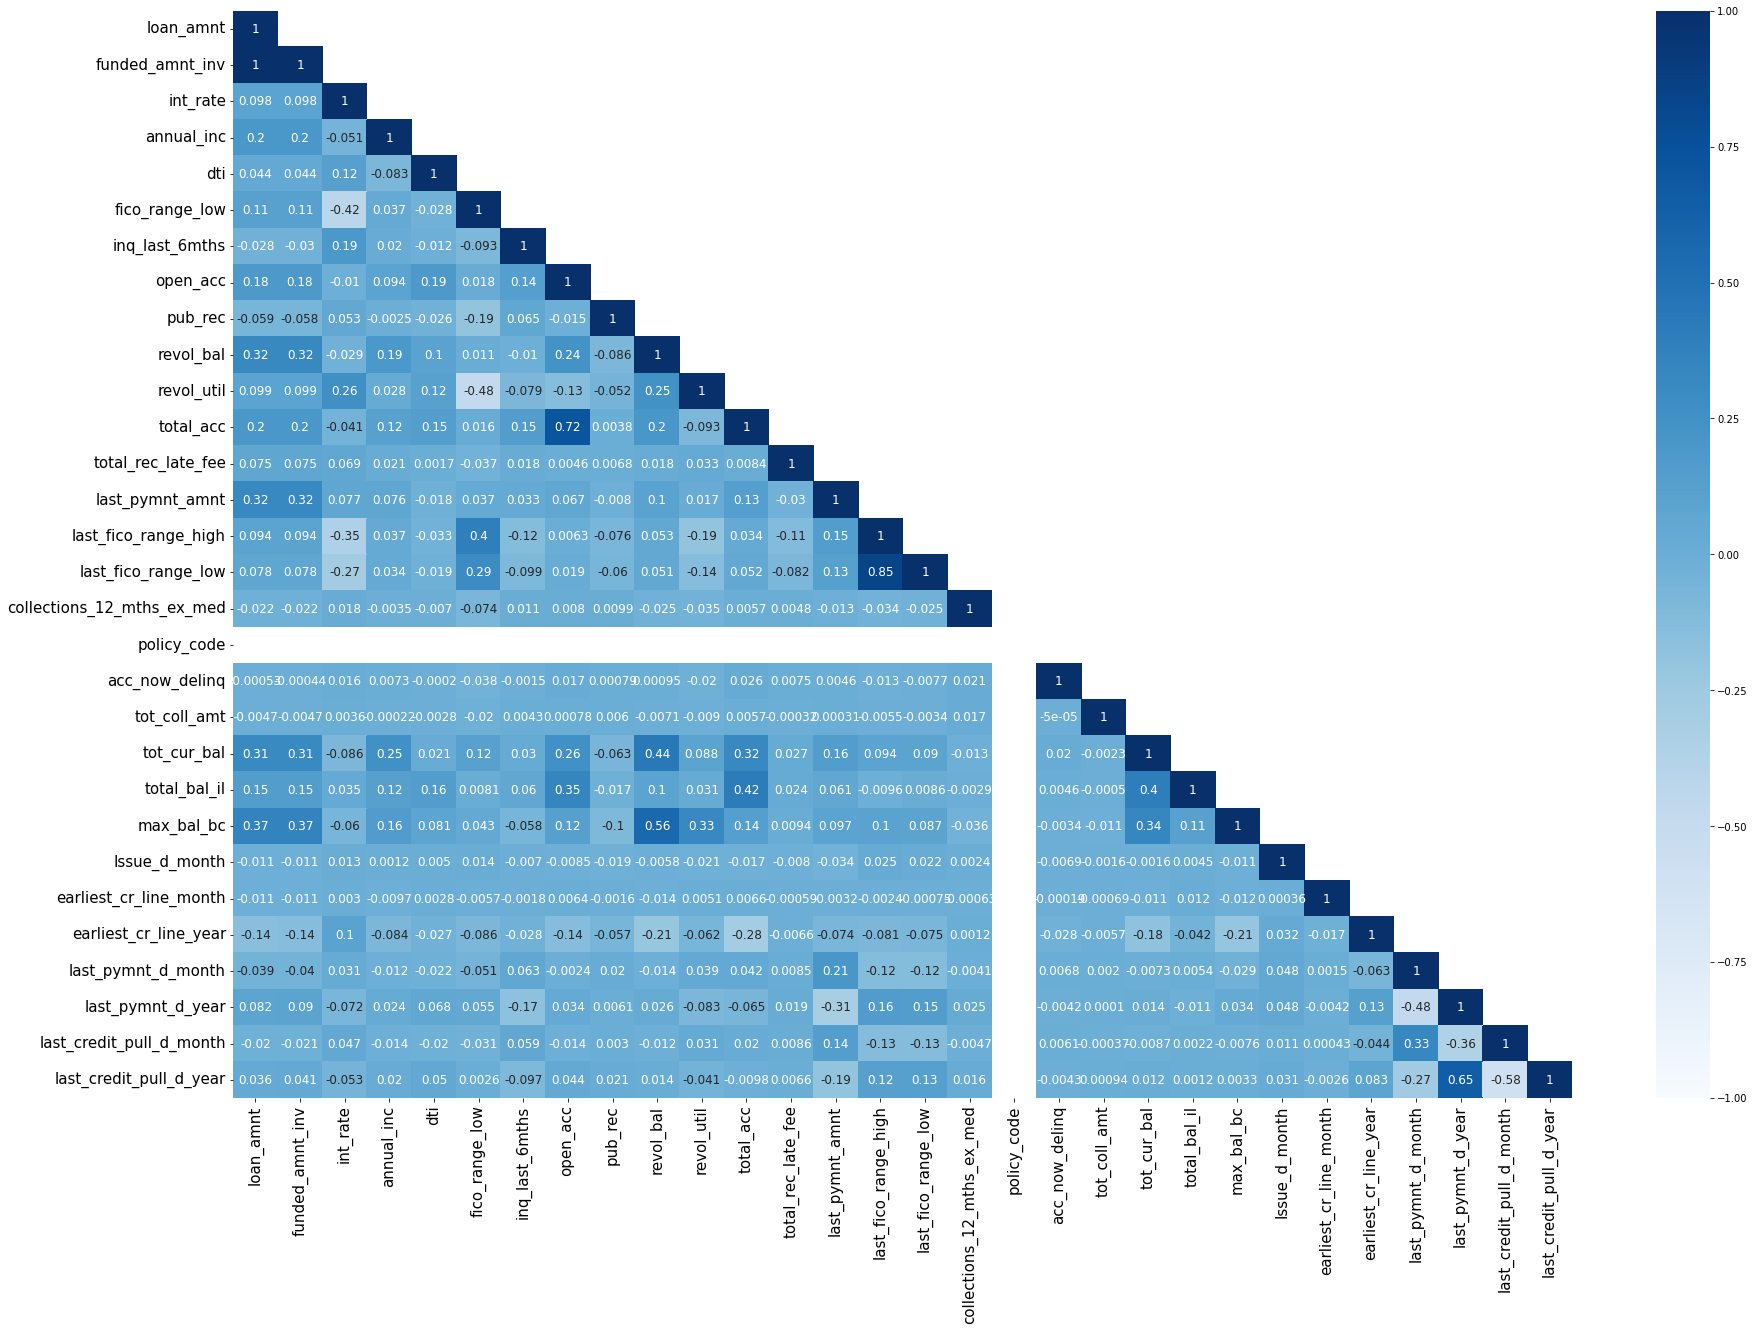

In [ ]:
plt.figure(figsize = (30,20))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask, k = 1)] = True
sns.heatmap(correlation, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()